<center><font size = "10"> Week 13 - Simplification<center>
<center><font size = "8">Tutorial 01: Point Neurons<center>

<font size='3'><font color='blue'> This tutorial provides an overview of how to use the Integarte-And-Fire [(IF)](https://www.neuron.yale.edu/neuron/static/py_doc/modelspec/programmatic/mechanisms/mech.html) neuron model implemented in Neuron.

## Load useful packages and external files

In [1]:
from neuron import h
import matplotlib.pyplot as plt
import math as m

# Load external files & initialize
h.load_file("stdrun.hoc");
soma = h.Section() # dummy section so h._ref_t works

# 1. Regular firing neuron 
<font size='3'>[(IntFire1)](https://www.neuron.yale.edu/neuron/static/py_doc/modelspec/programmatic/mechanisms/mech.html#IntFire1)

## 1.1 Create artificial cell

In [2]:
# IntFire1 artificial cell
if1 = h.IntFire1()
if1.tau = 10 # membrane time constant
if1.refrac = 5 # refractory period

## 1.2 Create stimulation

In [3]:
# Stimulator
s1 = h.NetStim()
s1.interval = 10 # inter-spike interval
s1.number = 100 # number of spikes
s1.start = 5 # start

## 1.3 Connect stimulation with cell

In [4]:
# connect stimulator to IF1 cell
nc1 = h.NetCon(s1, if1)
nc1.weight[0] = 0.7 # weight of each event

## 1.4 Store input, output and time

In [5]:
# store input spike times
nc1_v = h.Vector()
nc1.record(nc1_v)

# store output spike (event) times
ev1 = h.NetCon(if1, None)
ev1_v = h.Vector()
ev1.record(ev1_v)

# record time
time_v = h.Vector()
time_v.record(h._ref_t)

Vector[2]

## 1.5 Run the simulation

In [6]:
# initialize
h.stdinit()
h.finitialize(-65)

# record M function
vm1_v = h.Vector()
vm1_v.append(if1.M())

tstop = 200 # final time
nstep = m.ceil(tstop / h.dt) # number of time steps
for i in range(0,nstep):
    h.fadvance() # advance time step
    vm1_v.append(if1.M()) # record M function

## 1.6 Plot membrane voltage, input and output

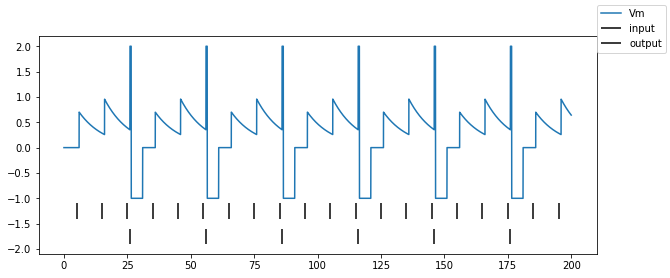

In [7]:
fig, ax = plt.subplots(figsize=(10,4))
ax.plot(time_v,vm1_v,label='Vm')
ax.vlines(nc1_v, ymin=-1.4, ymax=-1.1, color='black', label='input')
if len(ev1_v) > 0:
    ax.vlines(ev1_v, ymin=-1.9, ymax=-1.6, color='black', label='output')
fig.legend()

<font size ='3'>We observe periodic firing behavior.

# 2. Regular firing neuron with delay 
<font size='3'>[(IntFire2)](https://www.neuron.yale.edu/neuron/static/py_doc/modelspec/programmatic/mechanisms/mech.html#IntFire2)

## 2.1 Create cell

In [8]:
# IntFire2 artificial cell
if2 = h.IntFire2()
if2.taum = 8 # membrane time constant
if2.taus = 12 # synaptic time constant

## 2.2 Create stimulation

In [9]:
# Stimulator
s2 = h.NetStim()
s2.interval = 5 # inter-spike interval
s2.number = 100 # number of spikes
s2.start = 5 # periodic

## 2.3 Connect stimulation to cell

In [10]:
# connect stimulator to IF2 cell
nc2 = h.NetCon(s2, if2)
nc2.weight[0] = 0.5 # weight of each event

## 2.4 Store input, output and time 

In [11]:
# store input spike times
nc2_v = h.Vector()
nc2.record(nc2_v)

# store output spike (event) times
ev2 = h.NetCon(if2, None)
ev2_v = h.Vector()
ev2.record(ev2_v)

# record time
time_v = h.Vector()
time_v.record(h._ref_t)

Vector[6]

## 2.5 Run simulation

In [12]:
# initialize
h.stdinit()
h.finitialize(-65)

# record M and I functions
vm2_v = h.Vector()
im2_v = h.Vector()
vm2_v.append(if2.M())
im2_v.append(if2.I())

tstop = 200 # final time
nstep = m.ceil(tstop / h.dt) # number of time steps
for i in range(0,nstep):
    h.fadvance() # advance time step
    vm2_v.append(if2.M()) # record M function
    im2_v.append(if2.I()) # record I function

## 2.6 Plot input, output, membrane voltage and current

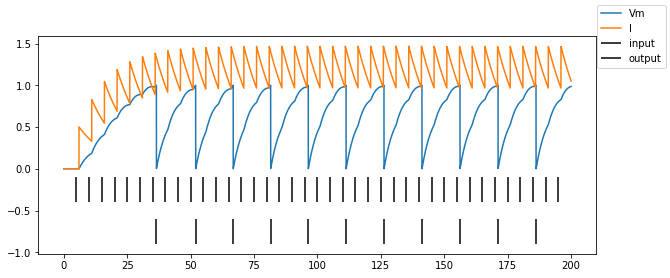

In [13]:
# plot membrane voltage and current
fig, ax = plt.subplots(figsize=(10,4))
ax.plot(time_v,vm2_v,label='Vm')
ax.plot(time_v,im2_v,label='I')
ax.vlines(nc2_v, ymin=-0.4, ymax=-0.1, color='black', label='input')
if len(ev2_v) > 0:
    ax.vlines(ev2_v, ymin=-0.9, ymax=-0.6, color='black', label='output')
fig.legend()

<font size='3'>We can observe a periodic firing behavior with a delayed first spike.

# 3. Non regular firing 

<font size='3'>[IntFire4](https://www.neuron.yale.edu/neuron/static/py_doc/modelspec/programmatic/mechanisms/mech.html#IntFire4)

## 3.1 Create cell

In [14]:
# IntFire4 artificial cell
if4 = h.IntFire4()
if4.taum = 8 # membrane time constant
if4.taui1 = 8 # inhibitory current time constant 1
if4.taui2 = 10 # inhibitory current time constant 2
if4.taue = 5 # excitatory current time constant

## 3.2 Create stimulations

In [15]:
# Stimulators
s4a = h.NetStim()
s4a.interval = 5 # inter-spike interval
s4a.number = 100 # number of spikes
s4a.start = 5 # periodic

s4b = h.NetStim()
s4b.interval = 25 # inter-spike interval
s4b.number = 10 # number of spikes
s4b.start = 8 # periodic

## 3.3 Connect stimulation with cell

In [16]:
# connect stimulators to IF2 cell
nc4a = h.NetCon(s4a, if4)
nc4a.weight[0] = 0.5 # weight of each event
# store input spike times
nc4a_v = h.Vector()
nc4a.record(nc4a_v)

nc4b = h.NetCon(s4b, if4)
nc4b.weight[0] = -0.5 # weight of each event (negative -> inhibitory)


## 3.4 Store input, output and time

In [17]:
# store input spike times
nc4b_v = h.Vector()
nc4b.record(nc4b_v)

# store output spike (event) times
ev4 = h.NetCon(if4, None)
ev4_v = h.Vector()
ev4.record(ev4_v)

# record time
time_v = h.Vector()
time_v.record(h._ref_t)

Vector[12]

## 3.5 Run simulation

In [18]:
# initialize
h.stdinit()
h.finitialize(-65)

# record M, E and I functions
vm4_v = h.Vector()
im4_v = h.Vector()
em4_v = h.Vector()
vm4_v.append(if4.M())
im4_v.append(if4.I())
em4_v.append(if4.E())

tstop = 200 # final time
nstep = m.ceil(tstop / h.dt) # number of time steps
for i in range(0,nstep):
    h.fadvance() # advance time step
    vm4_v.append(if4.M()) # record M function
    im4_v.append(if4.I()) # record I function
    em4_v.append(if4.E()) # record E function

## 3.6 Plot Inputs, output, membrane voltage and currents.

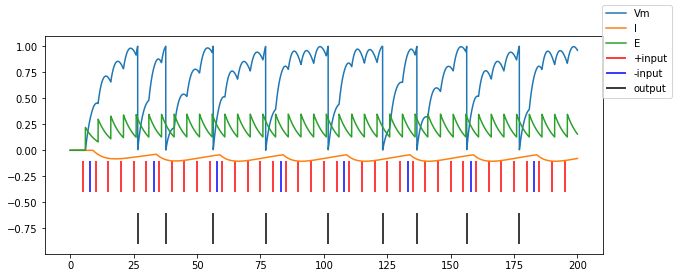

In [19]:
# plot membrane voltage and current
fig, ax = plt.subplots(figsize=(10,4))
ax.plot(time_v,vm4_v,label='Vm')
ax.plot(time_v,im4_v,label='I')
ax.plot(time_v,em4_v,label='E')
ax.vlines(nc4a_v, ymin=-0.4, ymax=-0.1, color='red', label='+input')
ax.vlines(nc4b_v, ymin=-0.4, ymax=-0.1, color='blue', label='-input')
if len(ev4_v) > 0:
    ax.vlines(ev4_v, ymin=-0.9, ymax=-0.6, color='black', label='output')
fig.legend()

<font size='3'>We observe non-periodic firing behavior.